In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

import platform

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 
coffee_df=pd.read_csv("행정동별_커피분야_소비인구(2020.03_2020.05).csv")



In [4]:
coffee_df.shape

(2410315, 8)

In [5]:
coffee_df.info

<bound method DataFrame.info of           gov_dn_cd  brtc_nm signgu_nm adstrd_nm        de sex_se year_se  \
0        1111051500    서울특별시       종로구     청운효자동  20200301      F      20   
1        1111051500    서울특별시       종로구     청운효자동  20200301      F      25   
2        1111051500    서울특별시       종로구     청운효자동  20200301      F      30   
3        1111051500    서울특별시       종로구     청운효자동  20200301      F      35   
4        1111051500    서울특별시       종로구     청운효자동  20200301      F      45   
...             ...      ...       ...       ...       ...    ...     ...   
2410310  5013062000  제주특별자치도      서귀포시       예래동  20200530      X      xx   
2410311  5013062000  제주특별자치도      서귀포시       예래동  20200531      F      25   
2410312  5013062000  제주특별자치도      서귀포시       예래동  20200531      M      35   
2410313  5013062000  제주특별자치도      서귀포시       예래동  20200531      M      40   
2410314  5013062000  제주특별자치도      서귀포시       예래동  20200531      X      xx   

         cnsmr_popltn_co  
0              9

In [6]:
coffee_df.columns

Index(['gov_dn_cd', 'brtc_nm', 'signgu_nm', 'adstrd_nm', 'de', 'sex_se',
       'year_se', 'cnsmr_popltn_co'],
      dtype='object')

In [7]:
#3
coffee_df.head()


,gov_dn_cd,brtc_nm,signgu_nm,adstrd_nm,de,sex_se,year_se,cnsmr_popltn_co
0,1111051500,서울특별시,종로구,청운효자동,20200301,F,20,91.445718
1,1111051500,서울특별시,종로구,청운효자동,20200301,F,25,83.825241
2,1111051500,서울특별시,종로구,청운효자동,20200301,F,30,53.343335
3,1111051500,서울특별시,종로구,청운효자동,20200301,F,35,60.963812
4,1111051500,서울특별시,종로구,청운효자동,20200301,F,45,30.481906


In [8]:
coffee_df.describe

<bound method NDFrame.describe of           gov_dn_cd  brtc_nm signgu_nm adstrd_nm        de sex_se year_se  \
0        1111051500    서울특별시       종로구     청운효자동  20200301      F      20   
1        1111051500    서울특별시       종로구     청운효자동  20200301      F      25   
2        1111051500    서울특별시       종로구     청운효자동  20200301      F      30   
3        1111051500    서울특별시       종로구     청운효자동  20200301      F      35   
4        1111051500    서울특별시       종로구     청운효자동  20200301      F      45   
...             ...      ...       ...       ...       ...    ...     ...   
2410310  5013062000  제주특별자치도      서귀포시       예래동  20200530      X      xx   
2410311  5013062000  제주특별자치도      서귀포시       예래동  20200531      F      25   
2410312  5013062000  제주특별자치도      서귀포시       예래동  20200531      M      35   
2410313  5013062000  제주특별자치도      서귀포시       예래동  20200531      M      40   
2410314  5013062000  제주특별자치도      서귀포시       예래동  20200531      X      xx   

         cnsmr_popltn_co  
0             

In [9]:
# 데이터 전처리 : 법인 및 외국인(X) 제외, 서울특별시만 추출
idx_ = coffee_df[coffee_df['sex_se']=='X'].index
coffee_df.drop(idx_) #외국인 데이터 생략
df_seoul = coffee_df[coffee_df['brtc_nm']=='서울특별시'] #서울시 데이터만 고려

In [10]:
import datetime
pd.set_option('mode.chained_assignment',  None)
df_seoul['de']=pd.to_datetime(df_seoul['de'].astype(str), format='%Y-%m-%d')

In [11]:
#한글 깨지는 현상 방지
f_path = "C:/windows/fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname = f_path).get_name()
rc('font', family = font_name)

In [12]:
#행정동별 커피소비인구 합계
df_seoul.groupby("adstrd_nm")["cnsmr_popltn_co"].sum().sort_values(ascending=False)

adstrd_nm
소공동            2.604429e+07
역삼1동           3.192134e+06
종로1.2.3.4가동    2.024608e+06
서교동            1.999583e+06
여의동            1.983389e+06
                   ...     
성현동            2.202318e+03
번2동            1.920360e+03
수색동            1.295481e+03
창신3동           1.181174e+03
면목5동           2.057529e+02
Name: cnsmr_popltn_co, Length: 418, dtype: float64

In [13]:
#행정동별 여성 커피소비인구 합계
df_seoul[df_seoul['sex_se']=="F"].groupby('adstrd_nm')['cnsmr_popltn_co'].sum().sort_values(ascending=False)

adstrd_nm
소공동            1.247528e+07
역삼1동           1.456822e+06
서교동            1.035234e+06
종로1.2.3.4가동    8.890276e+05
여의동            7.193349e+05
                   ...     
번2동            9.373186e+02
성현동            6.934634e+02
수색동            5.105719e+02
창신3동           1.600300e+02
면목5동           9.144572e+01
Name: cnsmr_popltn_co, Length: 418, dtype: float64

In [14]:
#행정동별 남성 커피소비인구 합계
df_seoul[df_seoul['sex_se']=="M"].groupby('adstrd_nm')['cnsmr_popltn_co'].sum().sort_values(ascending=False)

adstrd_nm
소공동            1.149790e+07
역삼1동           1.400819e+06
여의동            9.981910e+05
종로1.2.3.4가동    9.417842e+05
서교동            8.134630e+05
                   ...     
성현동            1.310722e+03
창신3동           1.021144e+03
번2동            9.830415e+02
수색동            5.715357e+02
면목5동           1.143071e+02
Name: cnsmr_popltn_co, Length: 418, dtype: float64

In [15]:
#행정동/연령대별 커피소비인구 합계
df_seoul.groupby(['adstrd_nm','year_se'])['cnsmr_popltn_co'].sum().sort_values(ascending=False)

adstrd_nm  year_se
소공동        25         5.833307e+06
           30         3.997664e+06
           20         3.720058e+06
           35         3.047680e+06
           40         2.062360e+06
                          ...     
대림1동       65         2.286143e+01
당산2동       00         2.286143e+01
청림동        60         2.286143e+01
송파2동       70         2.286143e+01
사당4동       65         2.286143e+01
Name: cnsmr_popltn_co, Length: 5359, dtype: float64

In [16]:
print(df_seoul['de'].dt.month)

0         3
1         3
2         3
3         3
4         3
         ..
639016    5
639017    5
639018    5
639019    5
639020    5
Name: de, Length: 639021, dtype: int64


<AxesSubplot:xlabel='signgu_nm'>

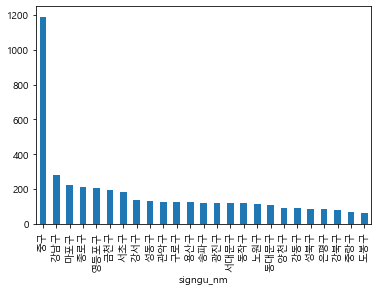

In [17]:
#행정구별 커피소비인구
df_seoul.groupby('signgu_nm')['cnsmr_popltn_co'].mean().sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:xlabel='year_se'>

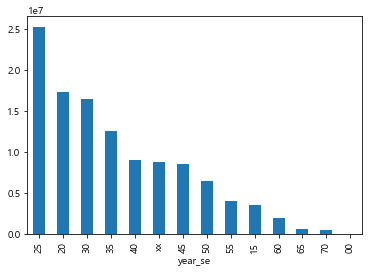

In [18]:
#연령대별 커피 소비인구
df_seoul.groupby(['year_se'])['cnsmr_popltn_co'].sum().sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:xlabel='de'>

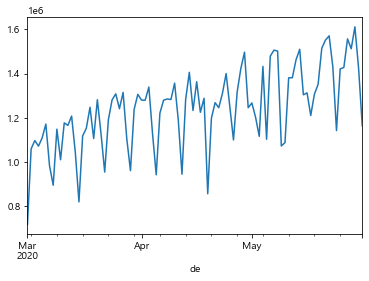

In [19]:
#월별 커피 소비인구 변화
df_seoul.groupby('de')['cnsmr_popltn_co'].sum().plot(kind='line')

In [21]:
#행정구/연령대별 커피 소비인구 테이블
df_seoul.pivot_table(index='signgu_nm', columns='year_se', values='cnsmr_popltn_co', aggfunc=np.mean)

year_se,00,15,20,25,30,35,40,45,50,55,60,65,70,xx
signgu_nm,,,,,,,,,,,,,,
강남구,26.170321,109.348672,379.145233,650.650274,461.112042,329.080086,226.439640,210.433900,151.959436,99.284358,64.225901,40.792235,39.291255,683.208101
강동구,28.825281,60.819348,123.586082,158.037287,108.386048,92.894773,76.744757,76.264491,62.293519,47.137397,36.821211,28.293046,25.924205,95.162633
강북구,25.792382,53.531641,130.526030,139.752511,90.077265,73.061900,62.940724,65.514467,56.796723,47.390359,33.699041,28.070038,26.138234,60.033405
강서구,24.730603,66.612351,169.622924,261.091930,185.905051,155.999832,121.305839,110.411020,86.742749,62.148886,43.385740,33.221123,28.557347,192.743623
관악구,22.861429,59.311092,215.620876,315.901196,167.406757,102.242598,71.953395,65.670735,66.362243,51.397831,37.543547,27.180957,25.628866,105.787103
광진구,25.267896,74.156873,254.423026,258.880448,140.892508,97.692685,72.456131,78.224129,70.025240,51.176010,36.105805,26.856406,26.447536,136.668391
구로구,25.242828,49.234624,139.298760,220.402854,172.277200,149.293096,114.169508,107.752397,76.292974,56.323597,39.817348,31.426416,27.676566,211.429051
금천구,22.861429,42.143724,150.821930,317.113487,270.935695,246.867038,181.283157,157.692519,97.878498,77.816229,57.449427,37.344545,32.733410,371.969323
노원구,26.828253,89.728913,225.359342,181.837078,107.370629,88.949634,87.557777,109.661941,90.669071,60.009090,37.439267,27.703808,26.311028,91.465141
